# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 7</font>

### Autor: Evandro Avellar


## Missão: Analisar o Comportamento de Compra de Consumidores.

## Nível de Dificuldade: Alto

Você recebeu a tarefa de analisar os dados de compras de um web site! Os dados estão no formato JSON e disponíveis junto com este notebook.

No site, cada usuário efetua login usando sua conta pessoal e pode adquirir produtos à medida que navega pela lista de produtos oferecidos. Cada produto possui um valor de venda. Dados de idade e sexo de cada usuário foram coletados e estão fornecidos no arquivo JSON.

Seu trabalho é entregar uma análise de comportamento de compra dos consumidores. Esse é um tipo de atividade comum realizado por Cientistas de Dados e o resultado deste trabalho pode ser usado, por exemplo, para alimentar um modelo de Machine Learning e fazer previsões sobre comportamentos futuros.

Mas nesta missão você vai analisar o comportamento de compra dos consumidores usando o pacote Pandas da linguagem Python e seu relatório final deve incluir cada um dos seguintes itens:

** Contagem de Consumidores **

* Número total de consumidores


** Análise Geral de Compras **

* Número de itens exclusivos
* Preço médio de compra
* Número total de compras
* Rendimento total


** Informações Demográficas Por Gênero **

* Porcentagem e contagem de compradores masculinos
* Porcentagem e contagem de compradores do sexo feminino
* Porcentagem e contagem de outros / não divulgados


** Análise de Compras Por Gênero **

* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Compras for faixa etária


** Identifique os 5 principais compradores pelo valor total de compra e, em seguida, liste (em uma tabela): **

* Login
* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Itens mais populares


** Identifique os 5 itens mais populares por contagem de compras e, em seguida, liste (em uma tabela): **

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra
* Itens mais lucrativos


** Identifique os 5 itens mais lucrativos pelo valor total de compra e, em seguida, liste (em uma tabela): **

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra


** Como considerações finais: **

* Seu script deve funcionar para o conjunto de dados fornecido.
* Você deve usar a Biblioteca Pandas e o Jupyter Notebook.


In [2]:
# Imports
import pandas as pd
import numpy as np

In [3]:
# Carrega o arquivo
load_file = "dados_compras.json"
purchase_file = pd.read_json(load_file, orient = "records")
purchase_file.head()

,Login,Idade,Sexo,Item ID,Nome do Item,Valor
0,Aelalis34,38,Masculino,165,Bone Crushing Silver Skewer,3.37
1,Eolo46,21,Masculino,119,"Stormbringer, Dark Blade of Ending Misery",2.32
2,Assastnya25,34,Masculino,174,Primitive Blade,2.46
3,Pheusrical25,21,Masculino,92,Final Critic,1.36
4,Aela59,23,Masculino,63,Stormfury Mace,1.27


In [4]:
purchase_file.nunique()

Login           573
Idade            37
Sexo              3
Item ID         183
Nome do Item    179
Valor           152
dtype: int64

> ## <font color='red'>É possível observar que há "Nomes de itens" com mais de um ID</font>

## Informações Sobre os Consumidores

### Número total de consumidores

In [5]:
consumidores = purchase_file.nunique().Login
print(f'Número total de consumidores {consumidores}')

Número total de consumidores 573


## Análise Geral de Compras

- Número de itens exclusivos
- Preço médio de compra
- Número total de compras
- Rendimento total

In [6]:
itens_exclusivos = purchase_file.nunique()['Item ID']
preco_medio = purchase_file.Valor.mean().round(2)
nu_tot_compras = purchase_file['Item ID'].count()
rendimento_total = purchase_file.Valor.sum()

print(f'Número de itens exclusivos: {itens_exclusivos}')
print(f'Preço médio de compra: $ {preco_medio:,.2f}')
print(f'Número total de compras: {nu_tot_compras}')
print(f'Rendimento total: $ {rendimento_total:,.2f}')


Número de itens exclusivos: 183
Preço médio de compra: $ 2.93
Número total de compras: 780
Rendimento total: $ 2,286.33


## Análise Demográfica

### Distribuição por idade

<AxesSubplot:>

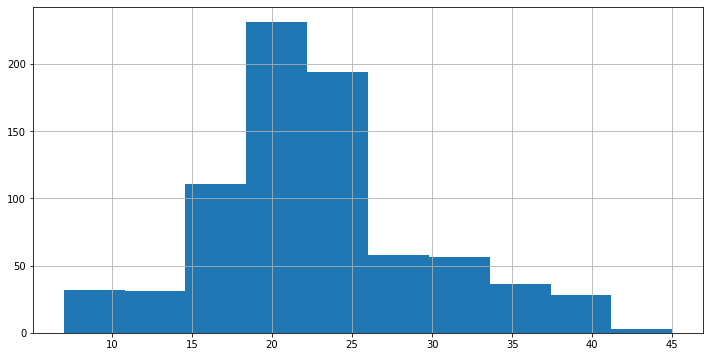

In [7]:
# Implemente aqui sua solução
purchase_file.Idade.hist(figsize=(12,6))

## Informações Demográficas Por Gênero

- Porcentagem e contagem de compradores masculinos
- Porcentagem e contagem de compradores do sexo feminino
- Porcentagem e contagem de outros / não divulgados

In [8]:
print(purchase_file.Sexo.unique())

['Masculino' 'Feminino' 'Outro / Não Divulgado']


In [9]:
df_masculino = purchase_file.query('Sexo == "Masculino"')
df_feminino = purchase_file.query('Sexo == "Feminino"')
df_outro = purchase_file.query('Sexo == "Outro / Não Divulgado"')


def porcentagem_contagem(df):
    total = purchase_file.nunique().Login
    contagem = df.nunique().Login
    porcentagem = (contagem/total*100).round(3)
    return contagem, porcentagem
    

cont_masc, porc_masc = porcentagem_contagem(df_masculino) 
cont_femi, porc_femi = porcentagem_contagem(df_feminino) 
cont_outr, porc_outr = porcentagem_contagem(df_outro) 


print(f'Porcentagem compradores do sexo masculinos: \t{porc_masc}% \t total de {cont_masc}')
print(f'Porcentagem compradores do sexo feminino: \t{porc_femi}% \t total de {cont_femi}')
print(f'Porcentagem compradores outros/não divulgados: \t {porc_outr}% \t total de {cont_outr}')


Porcentagem compradores do sexo masculinos: 	81.152% 	 total de 465
Porcentagem compradores do sexo feminino: 	17.452% 	 total de 100
Porcentagem compradores outros/não divulgados: 	 1.396% 	 total de 8


## Análise de Compras Por Gênero

- Número de compras
- Preço médio de compra
- Valor Total de Compra
- Compras for faixa etária

In [10]:
# Implemente aqui sua solução

def analise_genero(df):
    print(f'Número de compras: {df["Item ID"].count()}')
    print(f'Preço médio de compra: $ {df.Valor.mean():,.2f}')
    print(f'Preço médio de compra: $ {df.Valor.sum():,.2f}')
    df.Idade.hist(figsize=(12,6))

### Gênero masculino

Número de compras: 633
Preço médio de compra: $ 2.95
Preço médio de compra: $ 1,867.68


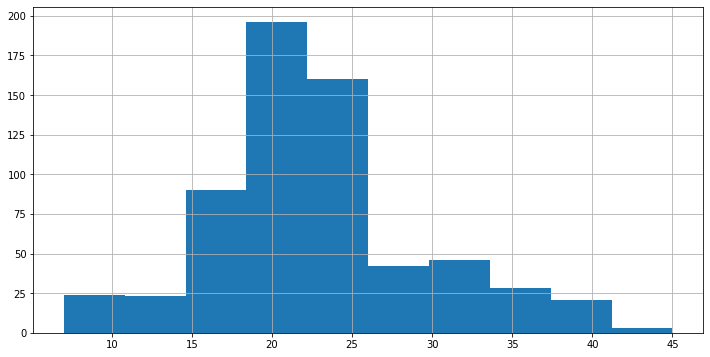

In [11]:
analise_genero(df_masculino)

### Gênero Feminino

Número de compras: 136
Preço médio de compra: $ 2.82
Preço médio de compra: $ 382.91


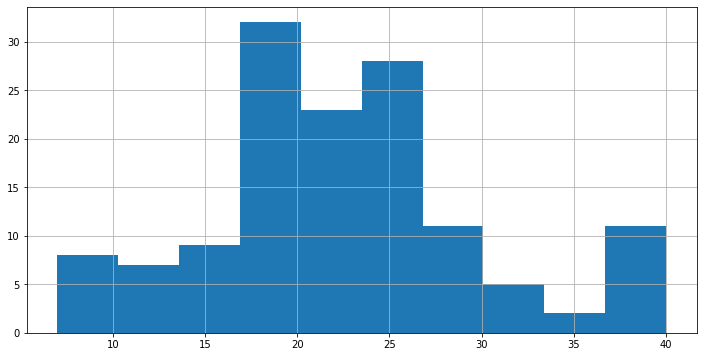

In [12]:
analise_genero(df_feminino)

### Gênero Outro/Não divulgado

Número de compras: 11
Preço médio de compra: $ 3.25
Preço médio de compra: $ 35.74


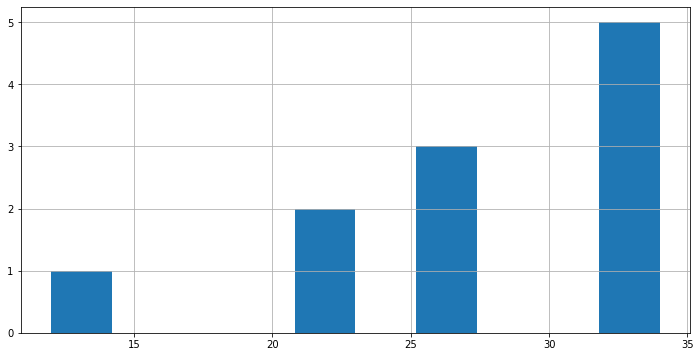

In [13]:
analise_genero(df_outro)

In [14]:
df_i = purchase_file.copy()
idades = [0, 17.99, 29.99, 39.99, 49,99]
faixas = ["Menos de 18", "18 a 30", "31 a 40", "41 a 50", "Mais de 50"]

df_i["Faixa de Idades"] = pd.cut(df_i["Idade"], idades, labels=faixas)

df_i.set_index('Faixa de Idades').sort_index()
df_i = df_i.groupby("Faixa de Idades").count()["Valor"].rename('Compras')

pd.DataFrame(df_i)

,Compras
Faixa de Idades,
Menos de 18,150
18 a 30,507
31 a 40,106
41 a 50,17
Mais de 50,0


## Consumidores Mais Populares (Top 5)

 Identifique os 5 principais compradores pelo valor total de compra e, em seguida, liste (em uma tabela):

- Login
- Número de compras
- Preço médio de compra
- Valor Total de Compra
- Itens mais populares (não faz sentido, deve ter sido erro da redação da questão)

In [15]:
purchase_file.head()

,Login,Idade,Sexo,Item ID,Nome do Item,Valor
0,Aelalis34,38,Masculino,165,Bone Crushing Silver Skewer,3.37
1,Eolo46,21,Masculino,119,"Stormbringer, Dark Blade of Ending Misery",2.32
2,Assastnya25,34,Masculino,174,Primitive Blade,2.46
3,Pheusrical25,21,Masculino,92,Final Critic,1.36
4,Aela59,23,Masculino,63,Stormfury Mace,1.27


In [16]:
df = purchase_file.copy()

In [17]:
# Agregando
df_novo = df.groupby('Login').agg({'Item ID':'count','Valor':'sum'}).sort_values('Valor', ascending=False)
df_novo['Preço médio'] = df_novo['Valor'] / df_novo['Item ID']
colunas = ['Número de Compras', 'Valor Total', 'Preço médio']
df_novo.columns= colunas
df_novo = df_novo.head(5)
df_novo

,Número de Compras,Valor Total,Preço médio
Login,,,
Undirrala66,5,17.06,3.412000
Saedue76,4,13.56,3.390000
Mindimnya67,4,12.74,3.185000
Haellysu29,3,12.73,4.243333
Eoda93,3,11.58,3.860000


## Itens Mais Populares
Identifique os 5 itens mais populares por contagem de compras e, em seguida, liste (em uma tabela): 

- ID do item
- Nome do item
- Número de compras
- Preço do item
- Valor Total de Compra
- Itens mais lucrativos

### Consideranto o 'Nome do Item' como chave

In [18]:
df.head()

,Login,Idade,Sexo,Item ID,Nome do Item,Valor
0,Aelalis34,38,Masculino,165,Bone Crushing Silver Skewer,3.37
1,Eolo46,21,Masculino,119,"Stormbringer, Dark Blade of Ending Misery",2.32
2,Assastnya25,34,Masculino,174,Primitive Blade,2.46
3,Pheusrical25,21,Masculino,92,Final Critic,1.36
4,Aela59,23,Masculino,63,Stormfury Mace,1.27


In [19]:


numero_compras = df.groupby(["Nome do Item"]).count()["Valor"].rename("Número de compras")
valor_total = df.groupby(["Nome do Item"]).sum()["Valor"].rename("Valor Total de Compra")
id_item = df.groupby(["Nome do Item"])['Item ID'].unique()
# Dataframe para os resultados

df_pop = pd.DataFrame({"Número de compras": numero_compras,
                       "Valor Total de Compra": valor_total,
                       "Item ID": id_item
                       })

df_pop = df_pop.sort_values("Número de compras", ascending=False).head(5)
df_pop


,Número de compras,Valor Total de Compra,Item ID
Nome do Item,,,
Final Critic,14,38.60,"[92, 101]"
Arcane Gem,11,24.53,[84]
"Betrayal, Whisper of Grieving Widows",11,25.85,[39]
Stormcaller,10,34.65,"[30, 180]"
Woeful Adamantite Claymore,9,11.16,[175]


### Consideranto o 'Item ID' como chave

In [20]:


numero_compras = df.groupby(["Item ID"]).count()["Valor"].rename("Número de compras")
valor_total = df.groupby(["Item ID"]).sum()["Valor"].rename("Valor Total de Compra")
nome_item = df.groupby(["Item ID"])['Nome do Item'].unique()


# Dataframe para os resultados

df_pop = pd.DataFrame({"Número de compras": numero_compras,
                       "Valor Total de Compra": valor_total,
                       "Nome do item": nome_item
                       })

df_pop = df_pop.sort_values("Número de compras", ascending=False).head(5)
df_pop.head()

,Número de compras,Valor Total de Compra,Nome do item
Item ID,,,
39,11,25.85,"[Betrayal, Whisper of Grieving Widows]"
84,11,24.53,[Arcane Gem]
31,9,18.63,[Trickster]
175,9,11.16,[Woeful Adamantite Claymore]
13,9,13.41,[Serenity]


## Itens Mais Lucrativos
Identifique os 5 itens mais lucrativos pelo valor total de compra e, em seguida, liste (em uma tabela):

- ID do item
- Nome do item
- Número de compras
- Preço do item
- Valor Total de Compra

In [27]:
# Implemente aqui sua solução


numero_compras = df.groupby(["Nome do Item"]).count()["Valor"].rename("Número de compras")
valor_total = df.groupby(["Nome do Item"]).sum()["Valor"].rename("Valor Total de Compra")
id_item = df.groupby(["Nome do Item"])['Item ID'].unique()
preco = df.groupby(["Nome do Item"])['Valor'].unique()
# Dataframe para os resultados

df_pop = pd.DataFrame({"Número de compras": numero_compras,
                       "Valor Total de Compra": valor_total,
                       "Item ID": id_item,
                       "Preço do item": preco
                       })

df_pop = df_pop.sort_values("Valor Total de Compra", ascending=False).head(5)
df_pop


,Número de compras,Valor Total de Compra,Item ID,Preço do item
Nome do Item,,,,
Final Critic,14,38.60,"[92, 101]","[1.3599999999999999, 4.62]"
Retribution Axe,9,37.26,[34],[4.14]
Stormcaller,10,34.65,"[30, 180]","[4.15, 2.7800000000000002]"
Spectral Diamond Doomblade,7,29.75,[115],[4.25]
Orenmir,6,29.70,[32],[4.95]


## Fim